In [1]:
import numpy as np
import itertools
import math
import scipy
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.patches as patches
from matplotlib import animation
from matplotlib import transforms
from mpl_toolkits.axes_grid1 import make_axes_locatable
import xarray as xr
import dask
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import pandas as pd

In [2]:
def latent_space_analysis(Images, title, iden):
    mean_image = np.mean(Images, axis=0)
    var_image = np.std(Images, axis=0)
    cmap="RdBu_r"
    fig, ax = plt.subplots(1,2, figsize=(16,2))
    cs0 = ax[0].imshow(var_image, cmap=cmap)
    ax[0].set_title("Image Standard Deviation")
    cs1 = ax[1].imshow(mean_image, cmap=cmap)
    ax[1].set_title("Image Mean")
    ax[0].set_ylim(ax[0].get_ylim()[::-1])
    ax[1].set_ylim(ax[1].get_ylim()[::-1])
    ax[1].set_xlabel("CRMs")
    ax[0].set_xlabel("CRMs")
    ax[0].set_ylabel("Pressure")
    ax[1].set_yticks([])
    y_ticks = np.arange(1300, 0, -300)
    ax[0].set_yticklabels(y_ticks)
    ax[1].set_yticklabels(y_ticks)
    divider = make_axes_locatable(ax[0])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(cs0, cax=cax)
    divider = make_axes_locatable(ax[1])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(cs1, cax=cax)
    plt.suptitle(title)
    #plt.savefig("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/model_graphs/latent_space_components/"+iden+'_'+title+'.png')
 

In [3]:
idn = '31'
z_test_tsne = np.load("Saved_Data/Covariance_Perplexity_40_Mean_Var_Latent_Space__83.npy")
#z_test_tsne = np.load("Saved_Data/Latent_Space__"+idn+".npy")
test_labels = np.load("/fast/gmooers/Preprocessed_Data/Centered_50_50/Y_Test.npy")
other_test_labels = np.load("/fast/gmooers/Preprocessed_Data/Centered_50_50/Improved_Y_Test.npy")
test_label_var = np.load("/fast/gmooers/Preprocessed_Data/Centered_50_50/Y_Test_Var.npy")

Test_Images = np.load("/fast/gmooers/Preprocessed_Data/Centered_50_50/Space_Time_W_Test.npy")
Max_Scalar = np.load("/fast/gmooers/Preprocessed_Data/Centered_50_50/Space_Time_Max_Scalar.npy")
Min_Scalar = np.load("/fast/gmooers/Preprocessed_Data/Centered_50_50/Space_Time_Min_Scalar.npy")
Test_Images = np.interp(Test_Images, (0, 1), (Min_Scalar, Max_Scalar))

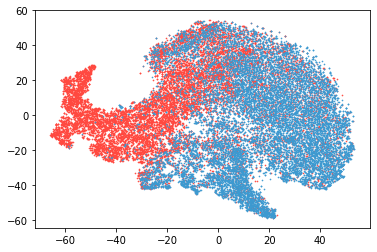

In [4]:
convection = np.squeeze(z_test_tsne[np.where(other_test_labels == 0),:])
no_convection = np.squeeze(z_test_tsne[np.where(other_test_labels == 1),:])
plt.scatter(x=convection[:, 0], y=convection[:, 1], c="#FF4940", s=0.4, label="Convective Activity")
plt.scatter(x=no_convection[:, 0], y=no_convection[:, 1], c="#3D9AD1", s=0.4, label="No convective Activity")

5
10
15
20
25
30
35
40
45
50
55


Text(0, 0.5, 'Inertia')

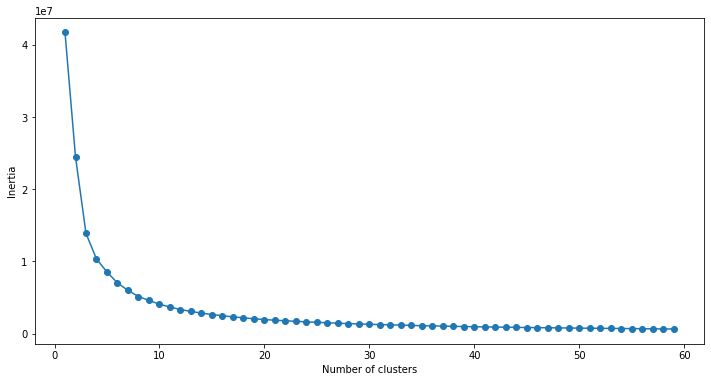

In [14]:
SSE = []
length = 60
for cluster in range(1,length):
    if cluster%5==0:
        print(cluster)
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(z_test_tsne)
    SSE.append(kmeans.inertia_)
#converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,length), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [26]:
N_cluster=3
km = KMeans(n_clusters=N_cluster, init='k-means++')
y_km = km.fit_predict(z_test_tsne)

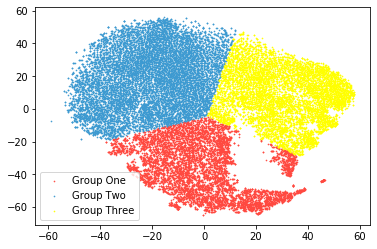

In [29]:
group_one = np.squeeze(z_test_tsne[np.where(y_km == 0),:])
group_two = np.squeeze(z_test_tsne[np.where(y_km == 1),:])
group_three = np.squeeze(z_test_tsne[np.where(y_km == 2),:])
plt.scatter(x=group_one[:, 0], y=group_one[:, 1], c="#FF4940", s=0.4, label="Group One")
plt.scatter(x=group_two[:, 0], y=group_two[:, 1], c="#3D9AD1", s=0.4, label="Group Two")
plt.scatter(x=group_three[:, 0], y=group_three[:, 1], c="yellow", s=0.4, label="Group Three")
plt.legend()

In [30]:
N_cluster=4
km = KMeans(n_clusters=N_cluster, init='k-means++')
y_km = km.fit_predict(z_test_tsne)

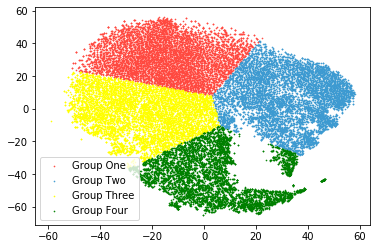

In [33]:
group_one = np.squeeze(z_test_tsne[np.where(y_km == 0),:])
group_two = np.squeeze(z_test_tsne[np.where(y_km == 1),:])
group_three = np.squeeze(z_test_tsne[np.where(y_km == 2),:])
group_four = np.squeeze(z_test_tsne[np.where(y_km == 3),:])
plt.scatter(x=group_one[:, 0], y=group_one[:, 1], c="#FF4940", s=0.4, label="Group One")
plt.scatter(x=group_two[:, 0], y=group_two[:, 1], c="#3D9AD1", s=0.4, label="Group Two")
plt.scatter(x=group_three[:, 0], y=group_three[:, 1], c="yellow", s=0.4, label="Group Three")
plt.scatter(x=group_four[:, 0], y=group_four[:, 1], c="green", s=0.4, label="Group Four")
plt.legend()

In [38]:
model = AgglomerativeClustering(n_clusters=2)
yhat = model.fit_predict(z_test_tsne)

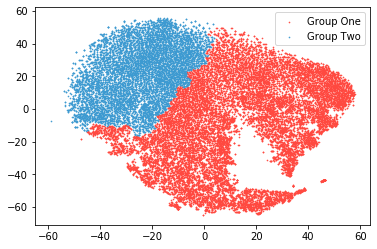

In [39]:
group_one = np.squeeze(z_test_tsne[np.where(yhat == 0),:])
group_two = np.squeeze(z_test_tsne[np.where(yhat == 1),:])
plt.scatter(x=group_one[:, 0], y=group_one[:, 1], c="#FF4940", s=0.4, label="Group One")
plt.scatter(x=group_two[:, 0], y=group_two[:, 1], c="#3D9AD1", s=0.4, label="Group Two")
plt.legend()

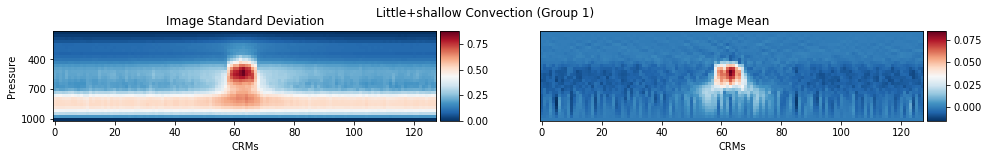

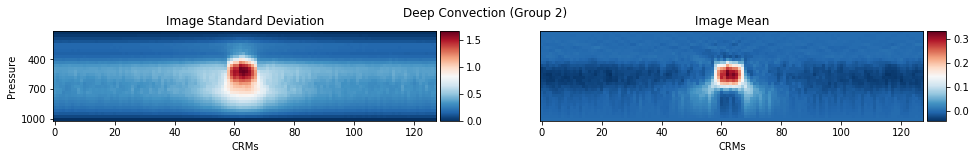

In [42]:
g1 = Test_Images[np.where(yhat==0),:,:]
g2 = Test_Images[np.where(yhat==1),:,:]

latent_space_analysis(np.squeeze(g1), "Little+shallow Convection (Group 1)", idn)
latent_space_analysis(np.squeeze(g2), "Deep Convection (Group 2)", idn)

In [15]:
model = AgglomerativeClustering(n_clusters=3)
yhat = model.fit_predict(z_test_tsne)

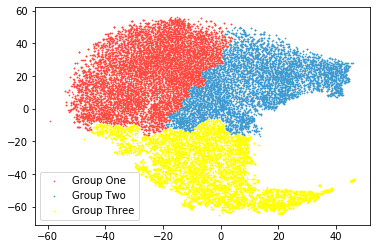

In [21]:
group_one = np.squeeze(z_test_tsne[np.where(yhat == 0),:])
group_two = np.squeeze(z_test_tsne[np.where(yhat == 1),:])
group_three = np.squeeze(z_test_tsne[np.where(yhat == 2),:])
plt.scatter(x=group_one[:, 0], y=group_one[:, 1], c="#FF4940", s=0.4, label="Group One")
plt.scatter(x=group_two[:, 0], y=group_two[:, 1], c="#3D9AD1", s=0.4, label="Group Two")
plt.scatter(x=group_three[:, 0], y=group_three[:, 1], c="yellow", s=0.4, label="Group Three")
plt.legend()

In [22]:
g1 = Test_Images[np.where(yhat==0),:,:]
g2 = Test_Images[np.where(yhat==1),:,:]
g3 = Test_Images[np.where(yhat==2),:,:]

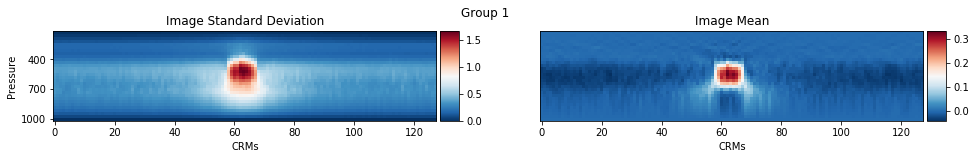

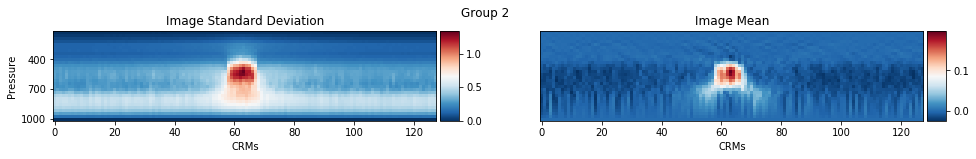

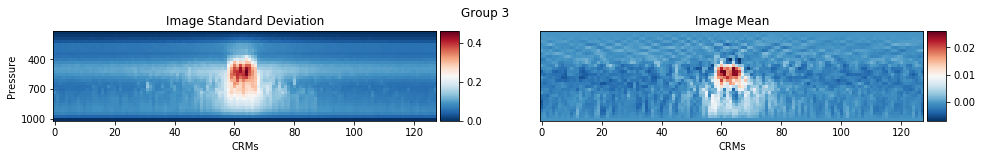

In [23]:
latent_space_analysis(np.squeeze(g1), "Deep Convection", idn)
latent_space_analysis(np.squeeze(g2), "Shallow - Shallow/Deep Convection", idn)
latent_space_analysis(np.squeeze(g3), "Little convection", idn)

In [24]:
model = AgglomerativeClustering(n_clusters=4)
yhat = model.fit_predict(z_test_tsne)

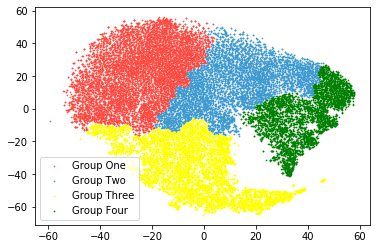

In [25]:
group_one = np.squeeze(z_test_tsne[np.where(yhat == 0),:])
group_two = np.squeeze(z_test_tsne[np.where(yhat == 1),:])
group_three = np.squeeze(z_test_tsne[np.where(yhat == 2),:])
group_four = np.squeeze(z_test_tsne[np.where(yhat == 3),:])
plt.scatter(x=group_one[:, 0], y=group_one[:, 1], c="#FF4940", s=0.4, label="Group One")
plt.scatter(x=group_two[:, 0], y=group_two[:, 1], c="#3D9AD1", s=0.4, label="Group Two")
plt.scatter(x=group_three[:, 0], y=group_three[:, 1], c="yellow", s=0.4, label="Group Three")
plt.scatter(x=group_four[:, 0], y=group_four[:, 1], c="green", s=0.4, label="Group Four")
plt.legend()

In [20]:
g1 = Test_Images[np.where(yhat==0),:,:]
g2 = Test_Images[np.where(yhat==1),:,:]
g3 = Test_Images[np.where(yhat==2),:,:]
g4 = Test_Images[np.where(yhat==3),:,:]

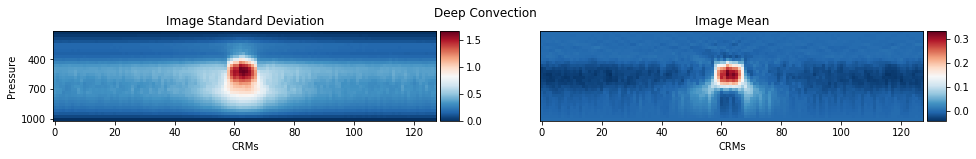

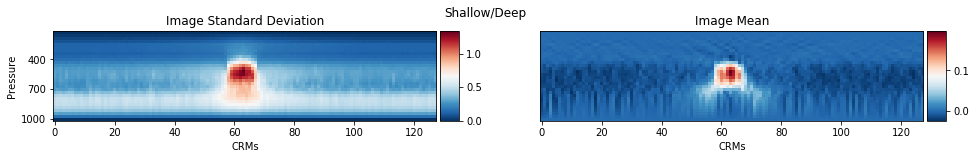

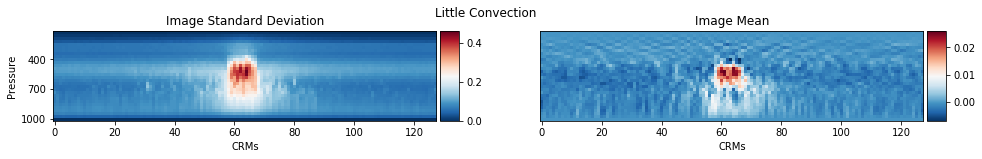

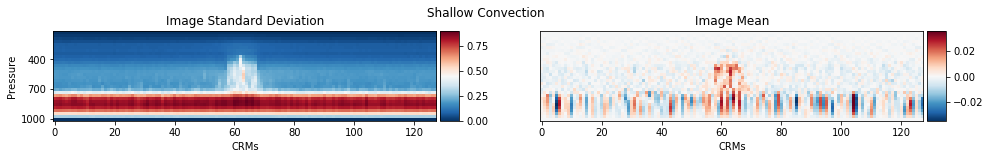

In [26]:
latent_space_analysis(np.squeeze(g1), "Deep Convection", idn)
latent_space_analysis(np.squeeze(g2), "Shallow/Deep", idn)
latent_space_analysis(np.squeeze(g3), "Little Convection", idn)
latent_space_analysis(np.squeeze(g4), "Shallow Convection", idn)

In [27]:
model = AgglomerativeClustering(n_clusters=5)
yhat = model.fit_predict(z_test_tsne)

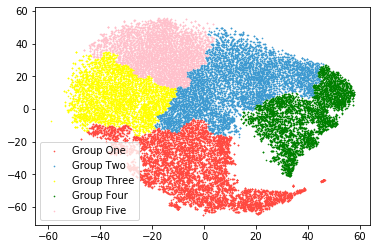

In [28]:
group_one = np.squeeze(z_test_tsne[np.where(yhat == 0),:])
group_two = np.squeeze(z_test_tsne[np.where(yhat == 1),:])
group_three = np.squeeze(z_test_tsne[np.where(yhat == 2),:])
group_four = np.squeeze(z_test_tsne[np.where(yhat == 3),:])
group_five = np.squeeze(z_test_tsne[np.where(yhat == 4),:])
plt.scatter(x=group_one[:, 0], y=group_one[:, 1], c="#FF4940", s=0.4, label="Group One")
plt.scatter(x=group_two[:, 0], y=group_two[:, 1], c="#3D9AD1", s=0.4, label="Group Two")
plt.scatter(x=group_three[:, 0], y=group_three[:, 1], c="yellow", s=0.4, label="Group Three")
plt.scatter(x=group_four[:, 0], y=group_four[:, 1], c="green", s=0.4, label="Group Four")
plt.scatter(x=group_five[:, 0], y=group_five[:, 1], c="pink", s=0.4, label="Group Five")
plt.legend()

g1 = Test_Images[np.where(yhat==0),:,:]
g2 = Test_Images[np.where(yhat==1),:,:]
g3 = Test_Images[np.where(yhat==2),:,:]
g4 = Test_Images[np.where(yhat==3),:,:]
g5 = Test_Images[np.where(yhat==4),:,:]

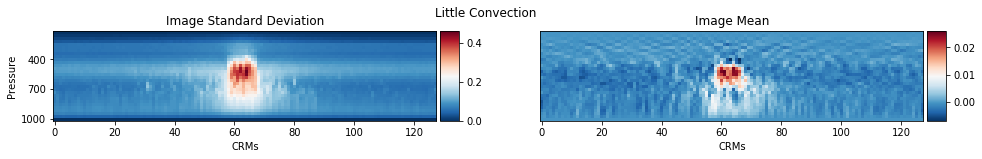

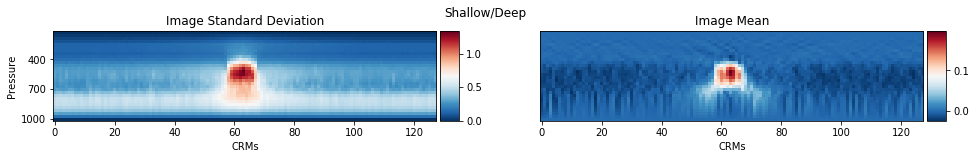

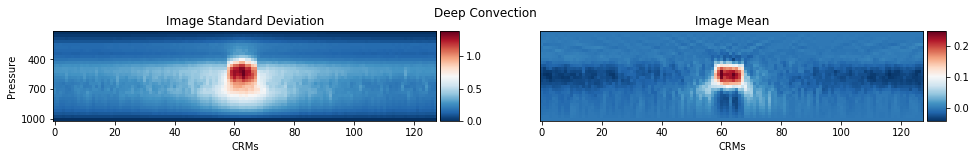

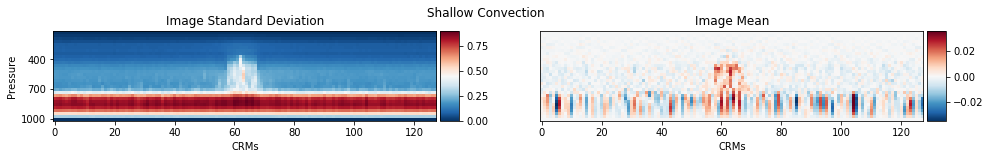

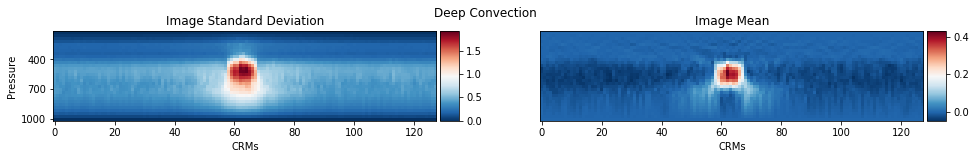

In [29]:
latent_space_analysis(np.squeeze(g1), "Little Convection", idn)
latent_space_analysis(np.squeeze(g2), "Shallow/Deep", idn)
latent_space_analysis(np.squeeze(g3), "Deep Convection", idn)
latent_space_analysis(np.squeeze(g4), "Shallow Convection", idn)
latent_space_analysis(np.squeeze(g5), "Deeper Convection", idn)

In [30]:
model = AgglomerativeClustering(n_clusters=6)
yhat = model.fit_predict(z_test_tsne)

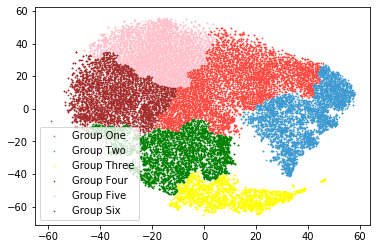

In [31]:
group_one = np.squeeze(z_test_tsne[np.where(yhat == 0),:])
group_two = np.squeeze(z_test_tsne[np.where(yhat == 1),:])
group_three = np.squeeze(z_test_tsne[np.where(yhat == 2),:])
group_four = np.squeeze(z_test_tsne[np.where(yhat == 3),:])
group_five = np.squeeze(z_test_tsne[np.where(yhat == 4),:])
group_six = np.squeeze(z_test_tsne[np.where(yhat == 5),:])
plt.scatter(x=group_one[:, 0], y=group_one[:, 1], c="#FF4940", s=0.4, label="Group One")
plt.scatter(x=group_two[:, 0], y=group_two[:, 1], c="#3D9AD1", s=0.4, label="Group Two")
plt.scatter(x=group_three[:, 0], y=group_three[:, 1], c="yellow", s=0.4, label="Group Three")
plt.scatter(x=group_four[:, 0], y=group_four[:, 1], c="green", s=0.4, label="Group Four")
plt.scatter(x=group_five[:, 0], y=group_five[:, 1], c="pink", s=0.4, label="Group Five")
plt.scatter(x=group_six[:, 0], y=group_six[:, 1], c="brown", s=0.4, label="Group Six")
plt.legend()

g1 = Test_Images[np.where(yhat==0),:,:]
g2 = Test_Images[np.where(yhat==1),:,:]
g3 = Test_Images[np.where(yhat==2),:,:]
g4 = Test_Images[np.where(yhat==3),:,:]
g5 = Test_Images[np.where(yhat==4),:,:]
g6 = Test_Images[np.where(yhat==5),:,:]

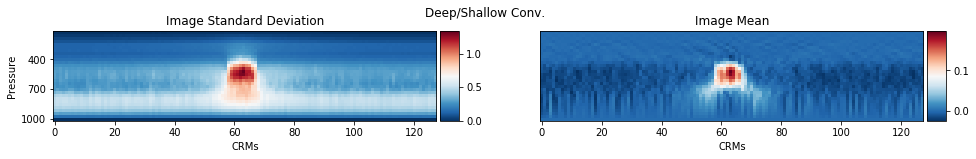

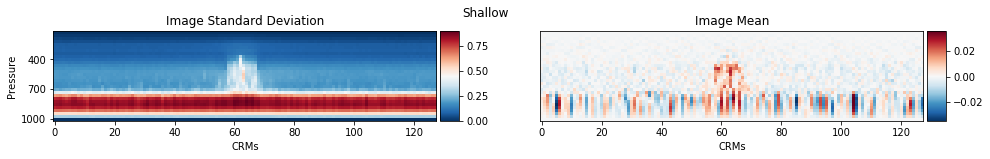

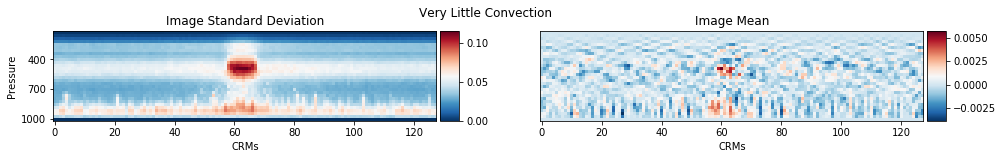

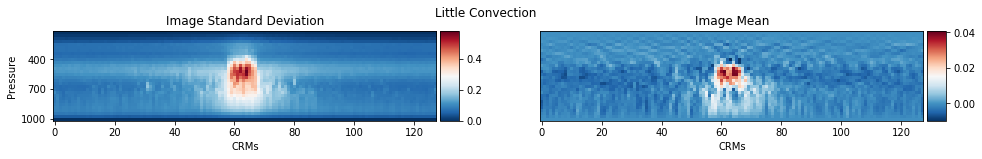

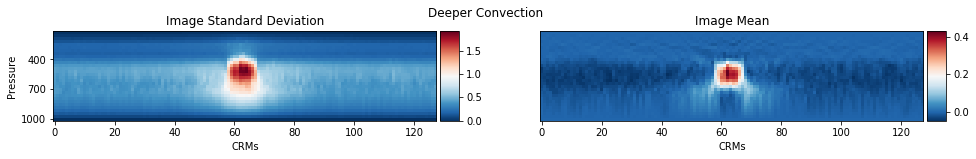

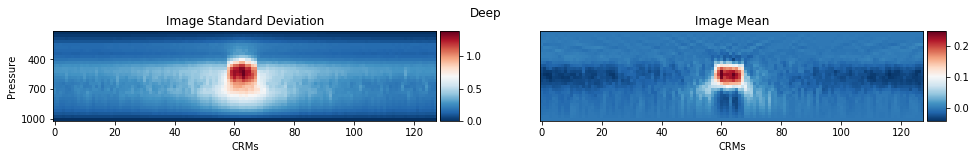

In [34]:
latent_space_analysis(np.squeeze(g1), "Deep/Shallow Conv.", idn)
latent_space_analysis(np.squeeze(g2), "Shallow", idn)
latent_space_analysis(np.squeeze(g3), "Very Little Convection", idn)
latent_space_analysis(np.squeeze(g4), "Little Convection", idn)
latent_space_analysis(np.squeeze(g5), "Deeper Convection", idn)
latent_space_analysis(np.squeeze(g6), "Deep", idn)

In [35]:
model = AgglomerativeClustering(n_clusters=7)
yhat = model.fit_predict(z_test_tsne)

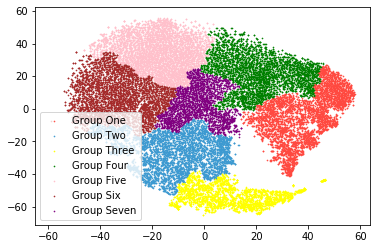

In [36]:
group_one = np.squeeze(z_test_tsne[np.where(yhat == 0),:])
group_two = np.squeeze(z_test_tsne[np.where(yhat == 1),:])
group_three = np.squeeze(z_test_tsne[np.where(yhat == 2),:])
group_four = np.squeeze(z_test_tsne[np.where(yhat == 3),:])
group_five = np.squeeze(z_test_tsne[np.where(yhat == 4),:])
group_six = np.squeeze(z_test_tsne[np.where(yhat == 5),:])
group_seven = np.squeeze(z_test_tsne[np.where(yhat == 6),:])
plt.scatter(x=group_one[:, 0], y=group_one[:, 1], c="#FF4940", s=0.4, label="Group One")
plt.scatter(x=group_two[:, 0], y=group_two[:, 1], c="#3D9AD1", s=0.4, label="Group Two")
plt.scatter(x=group_three[:, 0], y=group_three[:, 1], c="yellow", s=0.4, label="Group Three")
plt.scatter(x=group_four[:, 0], y=group_four[:, 1], c="green", s=0.4, label="Group Four")
plt.scatter(x=group_five[:, 0], y=group_five[:, 1], c="pink", s=0.4, label="Group Five")
plt.scatter(x=group_six[:, 0], y=group_six[:, 1], c="brown", s=0.4, label="Group Six")
plt.scatter(x=group_seven[:, 0], y=group_seven[:, 1], c="purple", s=0.4, label="Group Seven")
plt.legend()

g1 = Test_Images[np.where(yhat==0),:,:]
g2 = Test_Images[np.where(yhat==1),:,:]
g3 = Test_Images[np.where(yhat==2),:,:]
g4 = Test_Images[np.where(yhat==3),:,:]
g5 = Test_Images[np.where(yhat==4),:,:]
g6 = Test_Images[np.where(yhat==5),:,:]
g7 = Test_Images[np.where(yhat==5),:,:]

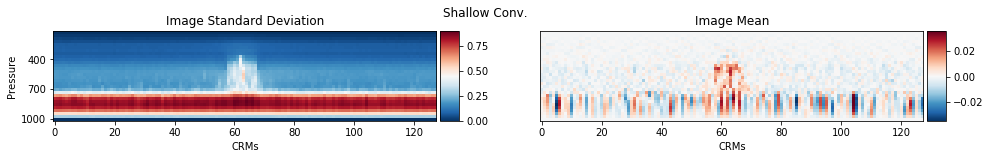

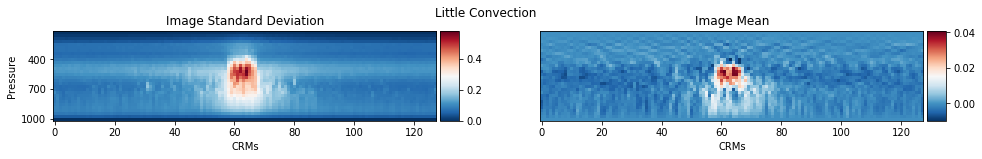

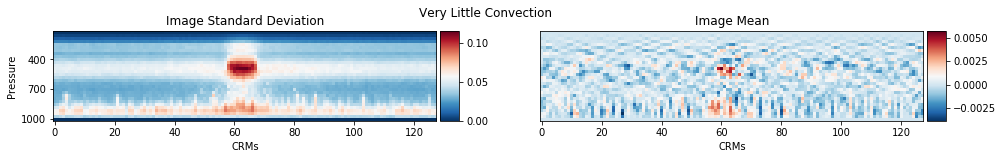

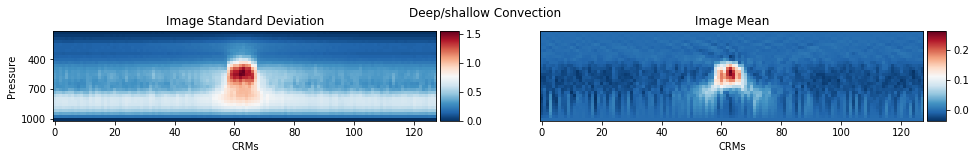

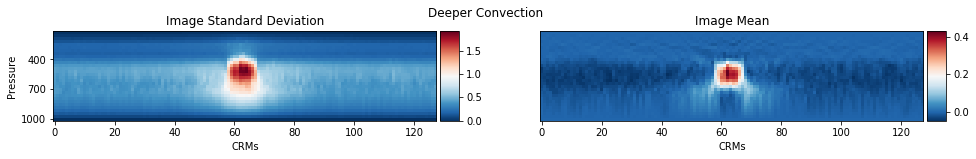

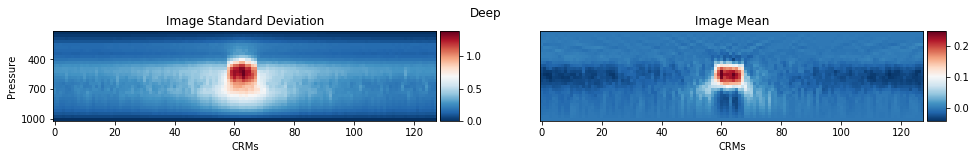

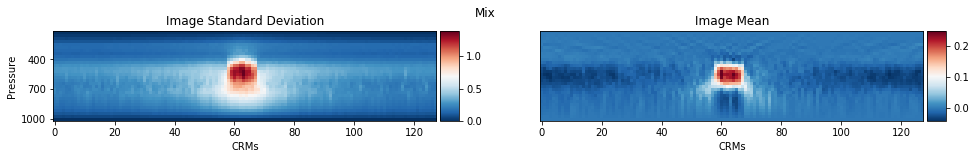

In [37]:
latent_space_analysis(np.squeeze(g1), "Shallow Conv.", idn)
latent_space_analysis(np.squeeze(g2), "Little Convection", idn)
latent_space_analysis(np.squeeze(g3), "Very Little Convection", idn)
latent_space_analysis(np.squeeze(g4), "Deep/shallow Convection", idn)
latent_space_analysis(np.squeeze(g5), "Deeper Convection", idn)
latent_space_analysis(np.squeeze(g6), "Deep", idn)
latent_space_analysis(np.squeeze(g7), "Mix", idn)

In [5]:
selected_x  = np.squeeze(np.argwhere(np.logical_and(z_test_tsne[:,0] > 45, z_test_tsne[:,0] < 60)))
selected_y = np.squeeze(np.argwhere(np.logical_and(z_test_tsne[:,1] > -60, z_test_tsne[:,1] < -40)))
extreme_tail = np.intersect1d(selected_x , selected_y)

selected_x  = np.squeeze(np.argwhere(np.logical_and(z_test_tsne[:,0] > 20, z_test_tsne[:,0] < 40)))
selected_y = np.squeeze(np.argwhere(np.logical_and(z_test_tsne[:,1] > -70, z_test_tsne[:,1] < -45)))
tip_tail = np.intersect1d(selected_x , selected_y)

selected_x  = np.squeeze(np.argwhere(np.logical_and(z_test_tsne[:,0] > 0, z_test_tsne[:,0] < 20)))
selected_y = np.squeeze(np.argwhere(np.logical_and(z_test_tsne[:,1] > -70, z_test_tsne[:,1] < -45)))
base_tail = np.intersect1d(selected_x , selected_y)

selected_x  = np.squeeze(np.argwhere(np.logical_and(z_test_tsne[:,0] > -35, z_test_tsne[:,0] < -10)))
selected_y = np.squeeze(np.argwhere(np.logical_and(z_test_tsne[:,1] > -50, z_test_tsne[:,1] < -30)))
upper_left_tail = np.intersect1d(selected_x , selected_y)

selected_x  = np.squeeze(np.argwhere(np.logical_and(z_test_tsne[:,0] > -10, z_test_tsne[:,0] < 10)))
selected_y = np.squeeze(np.argwhere(np.logical_and(z_test_tsne[:,1] > -30, z_test_tsne[:,1] < -5)))
upper_right_tail = np.intersect1d(selected_x , selected_y)

selected_x  = np.squeeze(np.argwhere(np.logical_and(z_test_tsne[:,0] > -25, z_test_tsne[:,0] < 0)))
selected_y = np.squeeze(np.argwhere(np.logical_and(z_test_tsne[:,1] > -18, z_test_tsne[:,1] < 5)))
red_blue_border = np.intersect1d(selected_x , selected_y)

selected_x  = np.squeeze(np.argwhere(np.logical_and(z_test_tsne[:,0] > -60, z_test_tsne[:,0] < -40)))
selected_y = np.squeeze(np.argwhere(np.logical_and(z_test_tsne[:,1] > -10, z_test_tsne[:,1] < 25)))
far_left = np.intersect1d(selected_x , selected_y)

selected_x  = np.squeeze(np.argwhere(np.logical_and(z_test_tsne[:,0] > -30, z_test_tsne[:,0] < -10)))
selected_y = np.squeeze(np.argwhere(np.logical_and(z_test_tsne[:,1] > 35, z_test_tsne[:,1] < 60)))
top = np.intersect1d(selected_x , selected_y)

selected_x  = np.squeeze(np.argwhere(np.logical_and(z_test_tsne[:,0] > 0, z_test_tsne[:,0] < 25)))
selected_y = np.squeeze(np.argwhere(np.logical_and(z_test_tsne[:,1] > 15, z_test_tsne[:,1] < 40)))
sparse_right = np.intersect1d(selected_x , selected_y)

selected_x  = np.squeeze(np.argwhere(np.logical_and(z_test_tsne[:,0] > 40, z_test_tsne[:,0] < 60)))
selected_y = np.squeeze(np.argwhere(np.logical_and(z_test_tsne[:,1] > 0, z_test_tsne[:,1] < 25)))
far_right = np.intersect1d(selected_x , selected_y)

selected_x  = np.squeeze(np.argwhere(np.logical_and(z_test_tsne[:,0] > 25, z_test_tsne[:,0] < 40)))
selected_y = np.squeeze(np.argwhere(np.logical_and(z_test_tsne[:,1] > -50, z_test_tsne[:,1] < -25)))
bottom_right = np.intersect1d(selected_x , selected_y)

selected_x  = np.squeeze(np.argwhere(np.logical_and(z_test_tsne[:,0] > 43, z_test_tsne[:,0] < 53)))
selected_y = np.squeeze(np.argwhere(np.logical_and(z_test_tsne[:,1] > -14, z_test_tsne[:,1] < -0)))
top_b = np.intersect1d(selected_x , selected_y)

selected_x  = np.squeeze(np.argwhere(np.logical_and(z_test_tsne[:,0] > 34, z_test_tsne[:,0] < 43)))
selected_y = np.squeeze(np.argwhere(np.logical_and(z_test_tsne[:,1] > -25, z_test_tsne[:,1] < -15)))
bottom_b = np.intersect1d(selected_x , selected_y)

In [6]:
Extreme_Tail_Images = Test_Images[extreme_tail,:,:]
Tip_Tail_Images = Test_Images[tip_tail,:,:]
Base_Tail_Images = Test_Images[base_tail,:,:]
Upper_Left_Tail_Images = Test_Images[upper_left_tail,:,:]
Upper_Right_Tail_Images = Test_Images[upper_right_tail,:,:]
Red_Blue_Border_Images = Test_Images[red_blue_border,:,:]
Far_Left_Images = Test_Images[far_left,:,:]
Top_Images = Test_Images[top,:,:]
Sparse_Right_Images = Test_Images[sparse_right,:,:]
Far_Right_Images = Test_Images[far_right,:,:]
Bottom_Right_Images = Test_Images[bottom_right,:,:]
Top_B_Images = Test_Images[top_b,:,:]
Bottom_B_Images = Test_Images[bottom_b,:,:]

#print(Extreme_Tail_Images.shape)
#print(Tip_Tail_Images.shape)
#print(Base_Tail_Images.shape)
#print(Upper_Left_Tail_Images.shape)
#print(Upper_Right_Tail_Images.shape)
#print(Red_Blue_Border_Images.shape)
#print(Far_Left_Images.shape)
#print(Top_Images.shape)
#print(Sparse_Right_Images.shape)
#print(Far_Right_Images.shape)
#print(Bottom_Right_Images.shape)
#print(Top_B_Images.shape)
#print(Bottom_B_Images.shape)

(51, 30, 128)
(711, 30, 128)
(1191, 30, 128)
(991, 30, 128)
(1774, 30, 128)
(2093, 30, 128)
(1084, 30, 128)
(1371, 30, 128)
(1883, 30, 128)
(1620, 30, 128)
(575, 30, 128)
(419, 30, 128)
(330, 30, 128)


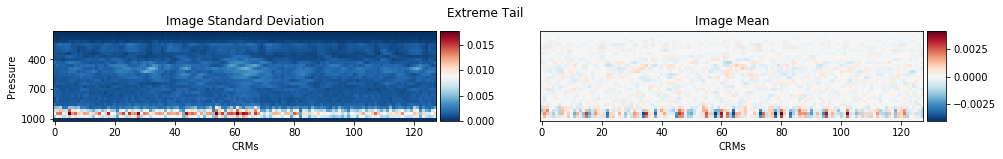

In [7]:
#latent_space_analysis(Extreme_Tail_Images, "Extreme Tail", idn)

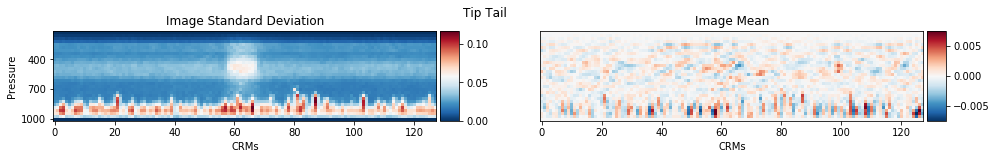

In [8]:
#latent_space_analysis(Tip_Tail_Images, "Tip Tail", idn)

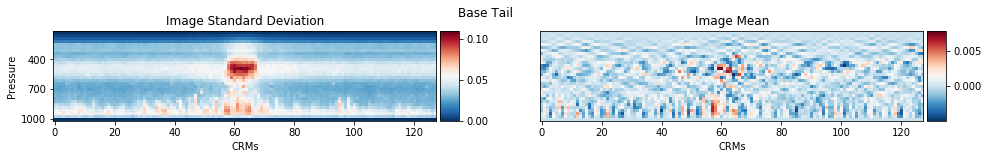

In [9]:
#latent_space_analysis(Base_Tail_Images, "Base Tail", idn)

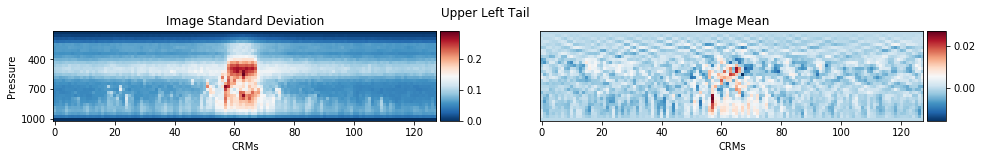

In [10]:
#latent_space_analysis(Upper_Left_Tail_Images, "Upper Left Tail", idn)

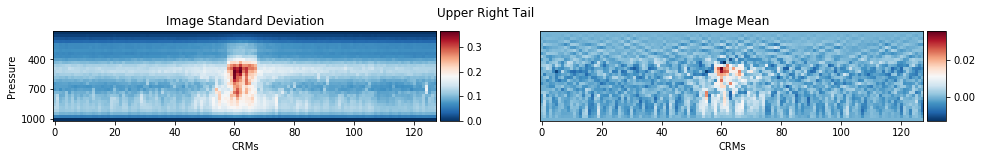

In [11]:
#latent_space_analysis(Upper_Right_Tail_Images, "Upper Right Tail", idn)

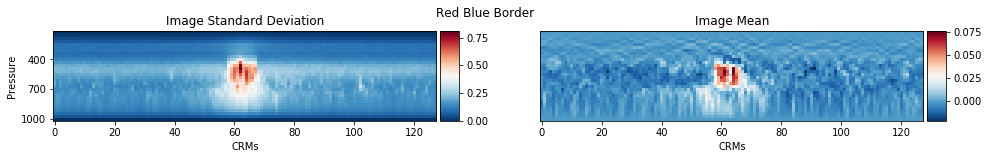

In [12]:
#latent_space_analysis(Red_Blue_Border_Images, "Red Blue Border", idn)

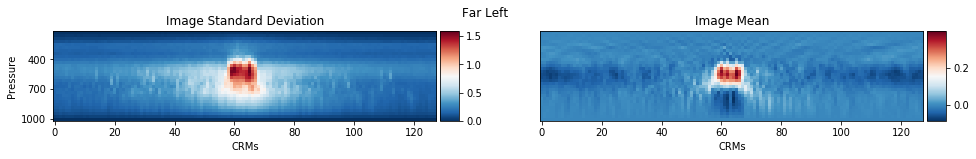

In [13]:
#latent_space_analysis(Far_Left_Images, "Far Left", idn)

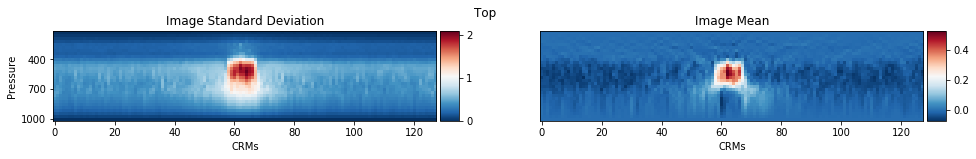

In [14]:
#latent_space_analysis(Top_Images, "Top", idn)

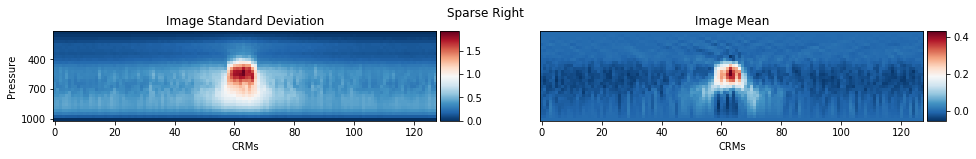

In [15]:
latent_space_analysis(Sparse_Right_Images, "Sparse Right", idn)

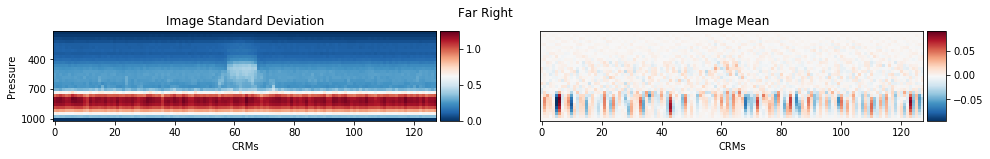

In [19]:
#latent_space_analysis(Far_Right_Images, "Far Right", idn)

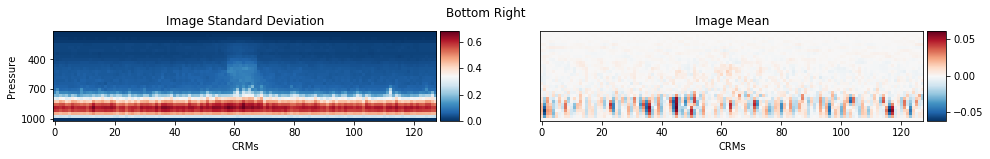

In [16]:
#latent_space_analysis(Bottom_Right_Images, "Bottom Right", idn)

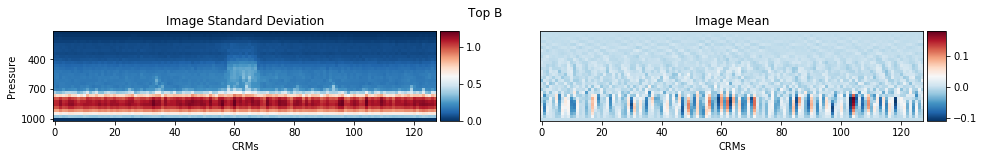

In [17]:
#latent_space_analysis(Top_B_Images, "Top B", idn)

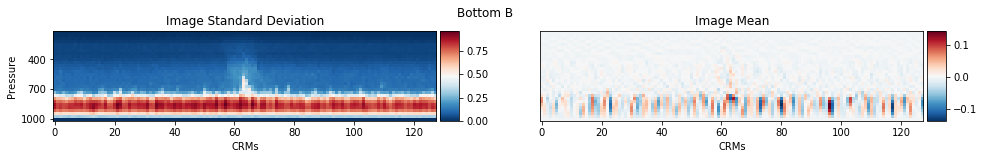

In [18]:
#latent_space_analysis(Bottom_B_Images, "Bottom B", idn)

In [6]:
path = "/DFS-L/DATA/pritchard/gmooers/Workflow/MAPS/SPCAM/100_Days/New_SPCAM5/archive/TimestepOutput_Neuralnet_SPCAM_216/atm/hist/TimestepOutput_Neuralnet_SPCAM_216.cam.h1.2009-01-20-00000.nc"
extra_variables = xr.open_dataset(path)
ha = extra_variables.hyai.values
hb = extra_variables.hybi.values
PS = 1e5
Pressures_real = PS*ha+PS*hb

In [12]:
def mean_filterer(means, stds, sample_count):
    new_means = np.zeros(shape=(len(means),len(means[0])))
    new_means[:,:] = np.nan
    pop_mean = 0.0
    count = 0
    for i in range(len(means)):
        for j in range(len(means[i])):
            test_mean = means[i,j]
            z = (test_mean-pop_mean)/((stds[i,j])/(np.sqrt(sample_count)))
            p_val = 1 - scipy.stats.norm.cdf(z)
            if p_val < 0.10:
                new_means[i,j] = means[i,j]
                #print(p_val)
                
            
    #print(fsdfsdfsdfsdf)       
    return new_means
    

def mikes_latent_animation(Dataset, latent_space, vx, vy, xdist, ydist, p_levels):
    fig, ax = plt.subplots(2,2, figsize=(36,16))
    feat_list = []
    #the real total you need
    num_steps = 235
    #num_steps = 64
    cmap= "RdBu_r"
    dummy_mean = np.zeros(shape=(30,128))
    dummy_mean[:,:] = np.nan
    dummy_std = np.zeros(shape=(30,128))
    dummy_std[:,:] = np.nan
    dummy_var_col = np.zeros(shape=(30))
    dummy_var_col[:] = np.nan
    count = 29
    for i in range(num_steps):
        rect = patches.Rectangle((vx,vy),xdist,ydist,linewidth=4,edgecolor='black',facecolor='none')
        selected_x  = np.squeeze(np.argwhere(np.logical_and(latent_space[:,0] > vx, latent_space[:,0] < vx+xdist)))
        selected_y = np.squeeze(np.argwhere(np.logical_and(latent_space[:,1] > vy, latent_space[:,1] < vy+ydist)))
        temp_points = np.intersect1d(selected_x , selected_y)
        Temp_Image = Dataset[temp_points, :, :]
        number_samples = len(Temp_Image)
        mean_image = np.mean(Temp_Image, axis=0)
        var_image = np.std(Temp_Image, axis=0)
        var_column = np.nanmean(var_image, axis = 1)
        
        for j in range(len(mean_image)):
            dummy_mean[count,:] = mean_image[j,:]
            dummy_std[count,:] = var_image[j,:]
            dummy_var_col[count] = var_column[j]
            count = count-1
        
        ax[0,0].scatter(convection[:, 0], convection[:, 1], c="#FF4940", s=0.4,  animated=True)
        ax[0,0].scatter(no_convection[:, 0], no_convection[:, 1], c="#3D9AD1", s=0.4,  animated=True)
        cs2 = ax[0,0].add_patch(rect)
        
        
        dummy_mean = mean_filterer(dummy_mean, dummy_std, number_samples)
        cs0 = ax[1,1].imshow(dummy_std, cmap=cmap, animated=True, vmin= 0.0, vmax = 1.0)
        ax[1,1].set_title("Image Standard Deviation")
        cs1  = ax[1,0].imshow(dummy_mean, cmap=cmap, animated=True, vmin = -0.2, vmax = 0.4)
        ax[1,0].set_title("Image Mean")
        #ax[1,1].set_ylim(ax[1,1].get_ylim()[::-1])
        #ax[1,1].set_ylim(ax[1,1].get_ylim()[::-1])
        
        ax[1,0].set_xlabel("CRMs")
        ax[1,1].set_xlabel("CRMs")
        ax[1,0].set_ylabel("Pressure (hpa)")
        
        ax[1,1].set_yticks([])
        y_ticks = np.arange(-100, 950, 150)
        ax[1,1].set_yticklabels(y_ticks)
        ax[1,0].set_yticklabels(y_ticks)
        
        divider = make_axes_locatable(ax[1,1])
        cax = divider.append_axes("right", size="5%", pad=0.05)
        fig.colorbar(cs0, cax=cax)
        divider = make_axes_locatable(ax[1,0])
        cax = divider.append_axes("right", size="5%", pad=0.05)
        fig.colorbar(cs1, cax=cax)
        
        
        cs3, = ax[0,1].plot(np.flipud(dummy_var_col), p_levels/100, color = "blue")
        ax[0,1].set_title("Pressure Level Standard Deviation")
        ax[0,1].set_xlabel("Magnitude (m/s)")
        ax[0,1].set_ylabel("Pressure")
        #ax[0,1].set_ylim(ax[0,1].get_ylim()[::-1])
        y_ticks = np.arange(1200, -200, -200)
        ax[0,1].set_yticklabels(y_ticks)
        
        feat_list.append([cs2, cs3, cs1, cs0])
        
        if i < 65:
            vx = vx+1.1
            vy = vy+0.80
        if i >= 65 and i < 87:
            vx = vx+1
            vy = vy-0.8
        if i >= 87 and i < 135:
            vx = vx+0.1
            vy = vy-1
        if i >= 135 and i < 200:
            vx = vx-1.0
            vy = vy-(1.0/8.0)
        if i >= 200:
            vx = vx-1
            vy = vy+1.5
        
            
 
        
            
            
 
            
        count = 29 
        
    ani = animation.ArtistAnimation(fig, feat_list, interval = 125, blit = False, repeat = True)
    ani.save('/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Animations/Figures/Var_4_Panel_Latent_Space.mp4')
    plt.show()
        
    
    
mikes_latent_animation(Test_Images, z_test_tsne, -64, -20, 10, 20, Pressures_real[:-1])
#mikes_latent_animation(Test_Images, z_test_tsne, 35, -26, 10, 20, Pressures_real[:-1]) 

/export/home/gmooers/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  if __name__ == '__main__':
/export/home/gmooers/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  if __name__ == '__main__':
/export/home/gmooers/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  if __name__ == '__main__':
/export/home/gmooers/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  if __name__ == '__main__':
/export/home/gmooers/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  if __name__ == '__main__':
/export/home/gmooers/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encounter

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f416133a268> (for post_execute):


KeyboardInterrupt: 